`BoomBikes` has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.


Here we are trying to get a better regressor model and also trying to find the features important to predict the demand.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data Visualisation 
- Data preparation
- Model building and evaluation


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [95]:
import warnings
warnings.filterwarnings('ignore')

In [96]:
df = pd.read_csv('data/day.csv')
print("Shape of dataset::{}".format(df.shape))

Shape of dataset::(730, 16)


In [97]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [98]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

Dropping the columns not needed. Dropping the casual and registered since the total count is already considered in another column.

- instant
- dteday
- casual
- registered

In [99]:
df.drop(columns= ['instant','dteday','casual','registered'], inplace = True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [100]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


We need to convert the categorical columns as per the labels mentioned in the data dictionary as the median values doesn't infer any relevant meaning.

#### Converting to categorical columns

In [101]:
def object_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

# Applying the function to the columns
df[['mnth']] = df[['mnth']].apply(object_map)

In [102]:
# def object_map(x):
#     return x.map({0: 2018, 1: 2019})

# # Applying the function to the columns
# df[['yr']] = df[['yr']].apply(object_map)

In [103]:
def object_map(x):
    return x.map({1: 'Spring', 2: 'Summer', 3: 'fall', 4: 'Winter'})

# Applying the function to the columns
df[['season']] = df[['season']].apply(object_map)

In [104]:
def object_map(x):
    return x.map({1: 'Wed', 2: 'Thurs', 3: 'Fri', 4: 'Sat', 5: 'Sun', 6: 'Mon', 0: 'Tues'})

# Applying the function to the columns
df[['weekday']] = df[['weekday']].apply(object_map)

In [105]:
def object_map(x):
    return x.map({1: 'A', 2: 'B', 3: 'C', 4: 'D'})

# Applying the function to the columns
df[['weathersit']] = df[['weathersit']].apply(object_map)

In [106]:
#checking the updataed dataframe
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Mon,0,B,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,0,B,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,A,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thurs,1,A,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,A,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Sat,1,B,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Sun,1,B,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Mon,0,B,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Tues,0,A,10.489153,11.58500,48.3333,23.500518,1796


In [107]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
df['workingday'].astype('category').value_counts()

1    499
0    231
Name: workingday, dtype: int64

In [108]:
# Checking the total count based on weather situations
df['weathersit'].astype('category').value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

In [109]:
#Applying some of the Auto EDA libraries to extrpolate the dataset further
!pip install sweetviz

import sweetviz as sv
sweet_report = sv.analyze(df)
sweet_report.show_html('sweet_report.html')



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Data Vizualization

- Checking the data distribution for the numerical features.
- Checking for multicollinearity etc

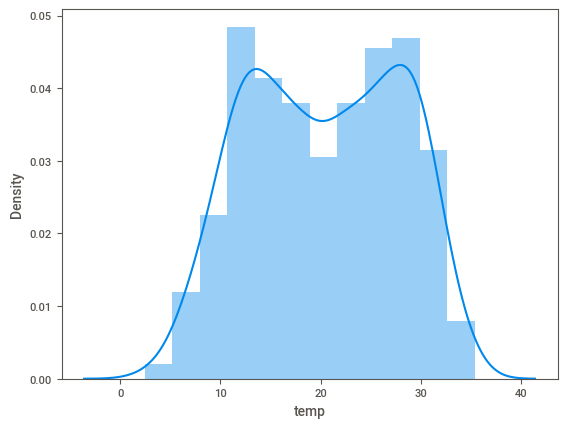

In [110]:
sns.distplot(df['temp'])
plt.show()

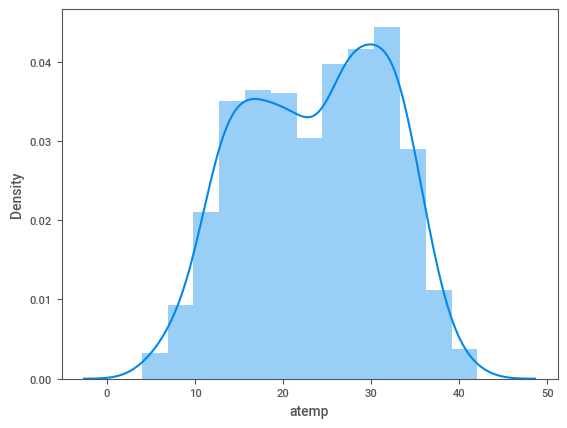

In [111]:
sns.distplot(df['atemp'])
plt.show()

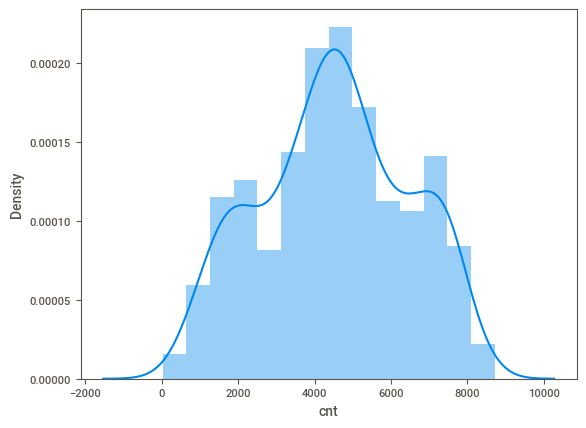

In [112]:
sns.distplot(df['cnt'])
plt.show()

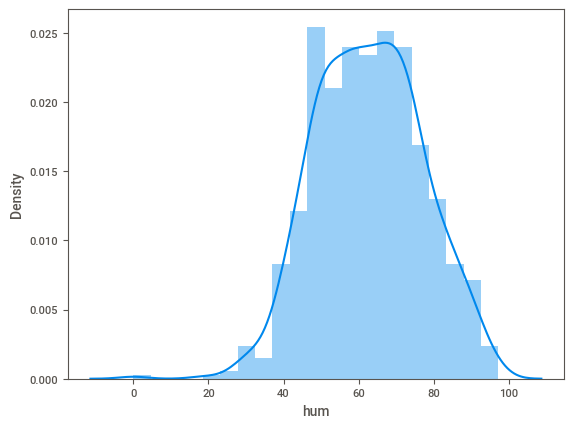

In [113]:
sns.distplot(df['hum'])
plt.show()

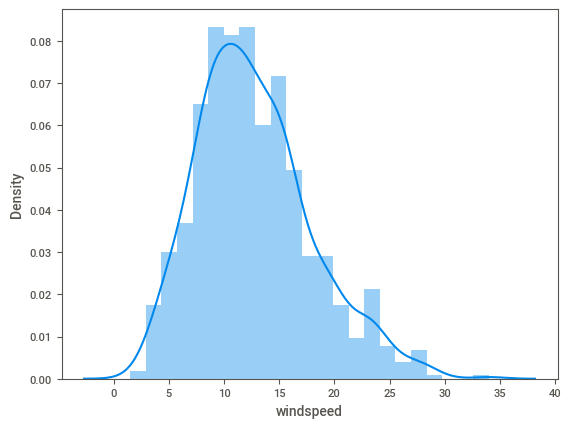

In [114]:
sns.distplot(df['windspeed'])
plt.show()

In [115]:
# All categorical variables in the dataset
BS_day_categorical=df.select_dtypes(exclude=['float64','datetime64','int64'])
print(BS_day_categorical.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


#### Visualizing Categorical Variables

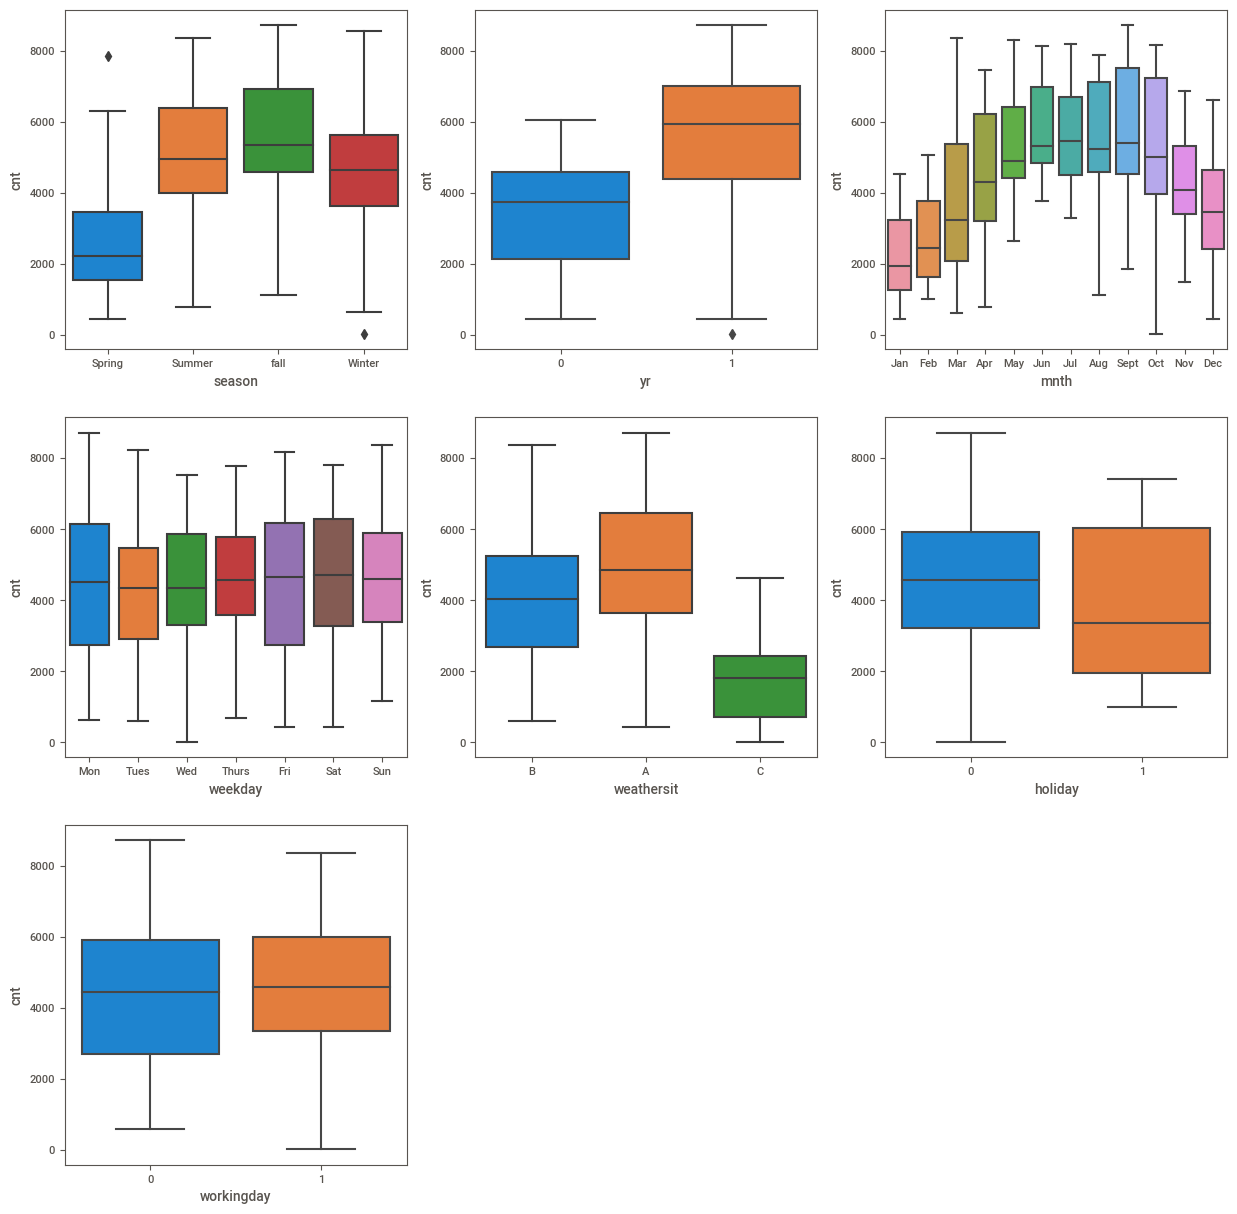

In [116]:
plt.figure(figsize=(15, 15))  
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.show()


##### Conclusions :

- As compared to season the demands seem to be very down as compared to other season of the year
- There has been a significant grow in demand of bikes from year 2018 to the next year
- Demand for bikes was highest from Jun through Oct months in a whole year.
- Weekday doesn not seem to be a good driver for understanding any patters for demand in bikes hence is not an important feature.
- In weathersit category C the demand has been very low due to some reason due to thunderstorm and rainy weather.
- In case of holiday we see that the data distribution is more in case of not an holiday howerver mot much change in case of demand of bikes.
- the data distribution is less in case of the day is neither weekend or holiday but no significant change in demand.

In [117]:
#checking for correlation
cor = df.corr()
cor

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


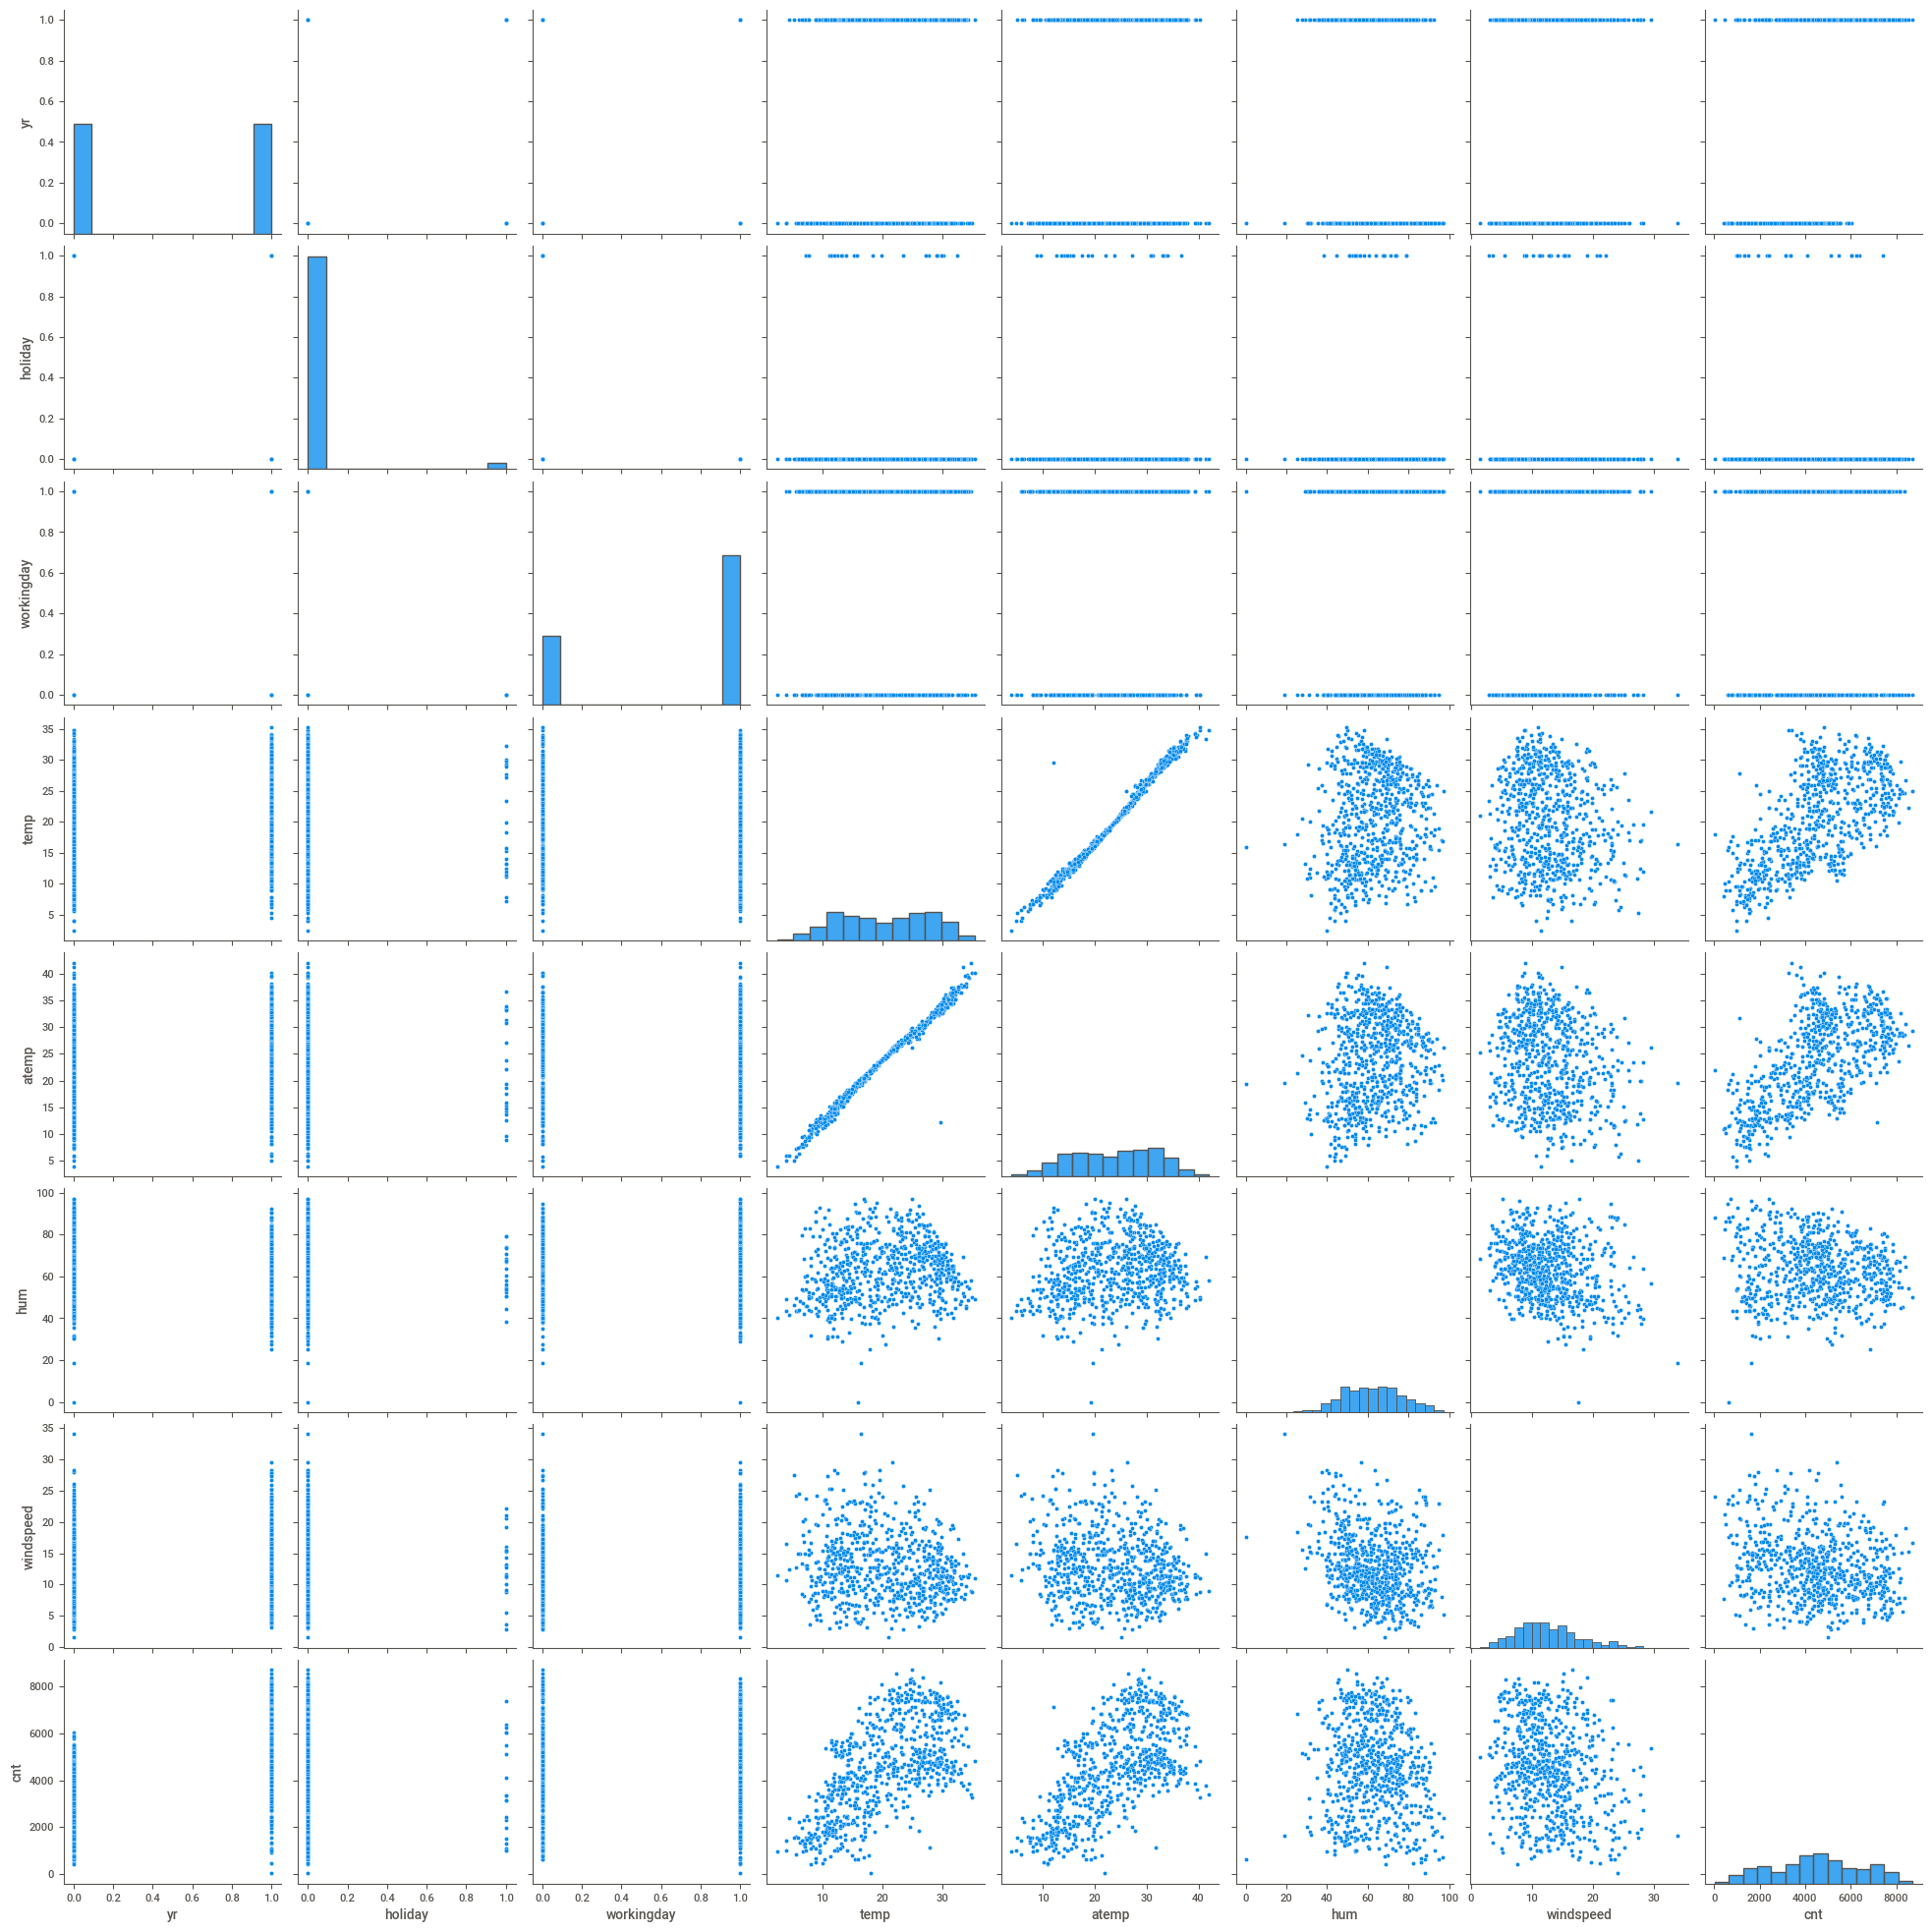

In [118]:
# generating a scatter plot
sns.pairplot(df)
plt.show()

<AxesSubplot: >

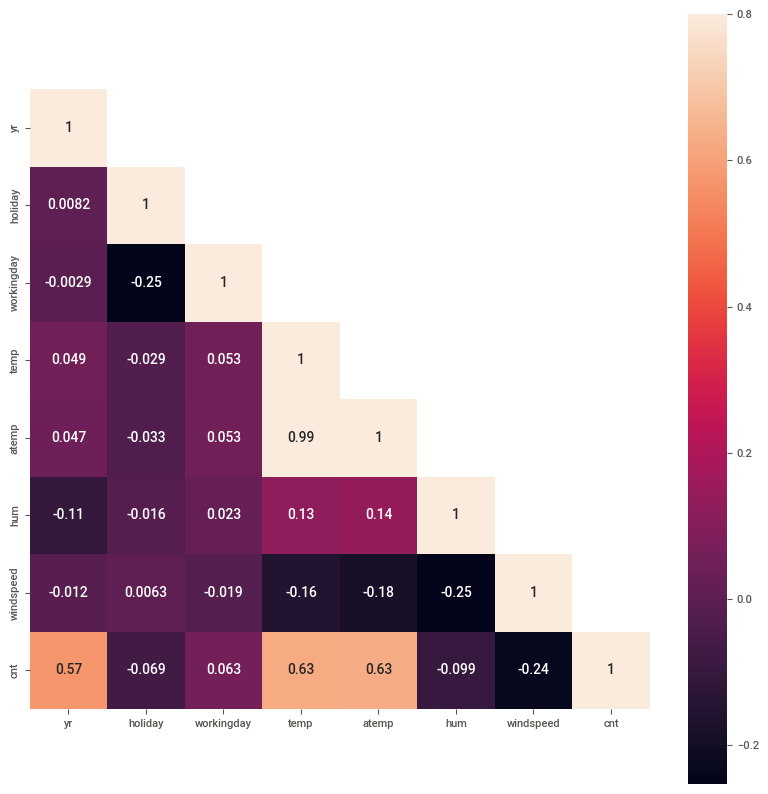

In [119]:
#Checking correlation with heatmap for better vizualisation
mask = np.array(cor)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor, mask=mask,vmax=.8, square=True,annot=True)


##### Insights from the correlation

##### Correlation from target column to independent columns
- There is a positive correlation between the cnt and the atemp column. 

##### Correlation between independent columns
- Workingday  has av -ve correlation with holiday feature.

While building the model we need to make sure to treat the multicollinearity features correctly.

In [120]:
#Removing the highly correlated columns
df.drop('atemp',axis=1,inplace=True)  

In [121]:
# Selecting all categorical variables
categorical=df.select_dtypes(include=['object'])
categorical

,season,mnth,weekday,weathersit
0,Spring,Jan,Mon,B
1,Spring,Jan,Tues,B
2,Spring,Jan,Wed,A
3,Spring,Jan,Thurs,A
4,Spring,Jan,Fri,A
...,...,...,...,...
725,Spring,Dec,Sat,B
726,Spring,Dec,Sun,B
727,Spring,Dec,Mon,B
728,Spring,Dec,Tues,A


In [122]:
# Convert into dummies
dummies = pd.get_dummies(categorical, drop_first=True)
dummies.head()

,season_Summer,season_Winter,season_fall,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
#dropping the categorical columns
df = df.drop(list(categorical.columns), axis=1)


In [124]:
# Adding dummy variables with the original dataframe
df = pd.concat([df, dummies], axis=1)

In [125]:
#updated data frame
df

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Winter,season_fall,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,65.2917,23.458911,2114,0,0,0,...,0,0,0,1,0,0,0,0,1,0
726,1,0,1,10.386653,59.0000,10.416557,3095,0,0,0,...,0,0,0,0,1,0,0,0,1,0
727,1,0,0,10.386653,75.2917,8.333661,1341,0,0,0,...,0,0,1,0,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,1796,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Model Building and Evaluation

In [126]:
# Split the dataframe into train and test sets
from sklearn.model_selection import train_test_split
np.random.seed(40)
df_train, df_test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=100)

In [127]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Winter,season_fall,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
367,1,0,1,6.150000,44.1250,24.499957,2236,0,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,17.835000,46.3333,12.166932,7570,0,1,0,...,1,0,0,1,0,0,0,0,0,0
44,0,0,1,17.015000,37.5833,27.999836,1913,0,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,13.154153,76.4167,8.750200,5008,0,1,0,...,0,0,0,0,1,0,0,0,1,0
379,1,0,0,6.833347,41.9167,16.834286,2311,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,1,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,1,0,...,0,0,1,0,0,0,0,0,1,0
79,0,0,1,17.647835,73.7391,19.348461,2077,1,0,0,...,0,0,0,0,0,0,0,1,1,0


### Scaling

We need to scle the features for better accuracy, interpretability and also so that the model takes less time to train. Here we need to exclude the dummy features and include only the numeric features. Also we need to do only for the train dataset.

In [128]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [129]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

df_train[var] = scaler.fit_transform(df_train[var])

In [130]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Summer,season_Winter,season_fall,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
367,1,0,1,-1.884077,-1.351866,2.236778,-1.159600,0,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,-0.306750,-1.193941,-0.119144,1.566084,0,1,0,...,1,0,0,1,0,0,0,0,0,0
44,0,0,1,-0.417439,-1.819690,2.905344,-1.324653,0,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,-0.938605,0.957450,-0.771827,0.256897,0,1,0,...,0,0,0,0,1,0,0,0,1,0
379,1,0,0,-1.791834,-1.509791,0.772439,-1.121275,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,1.450449,0.209525,-0.787775,1.408185,0,0,1,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,-1.487039,-1.482072,-1.238814,-1.322609,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,-1.284510,-0.496677,0.668885,-0.902566,0,1,0,...,0,0,1,0,0,0,0,0,1,0
79,0,0,1,-0.332015,0.765963,1.252711,-1.240849,1,0,0,...,0,0,0,0,0,0,0,1,1,0


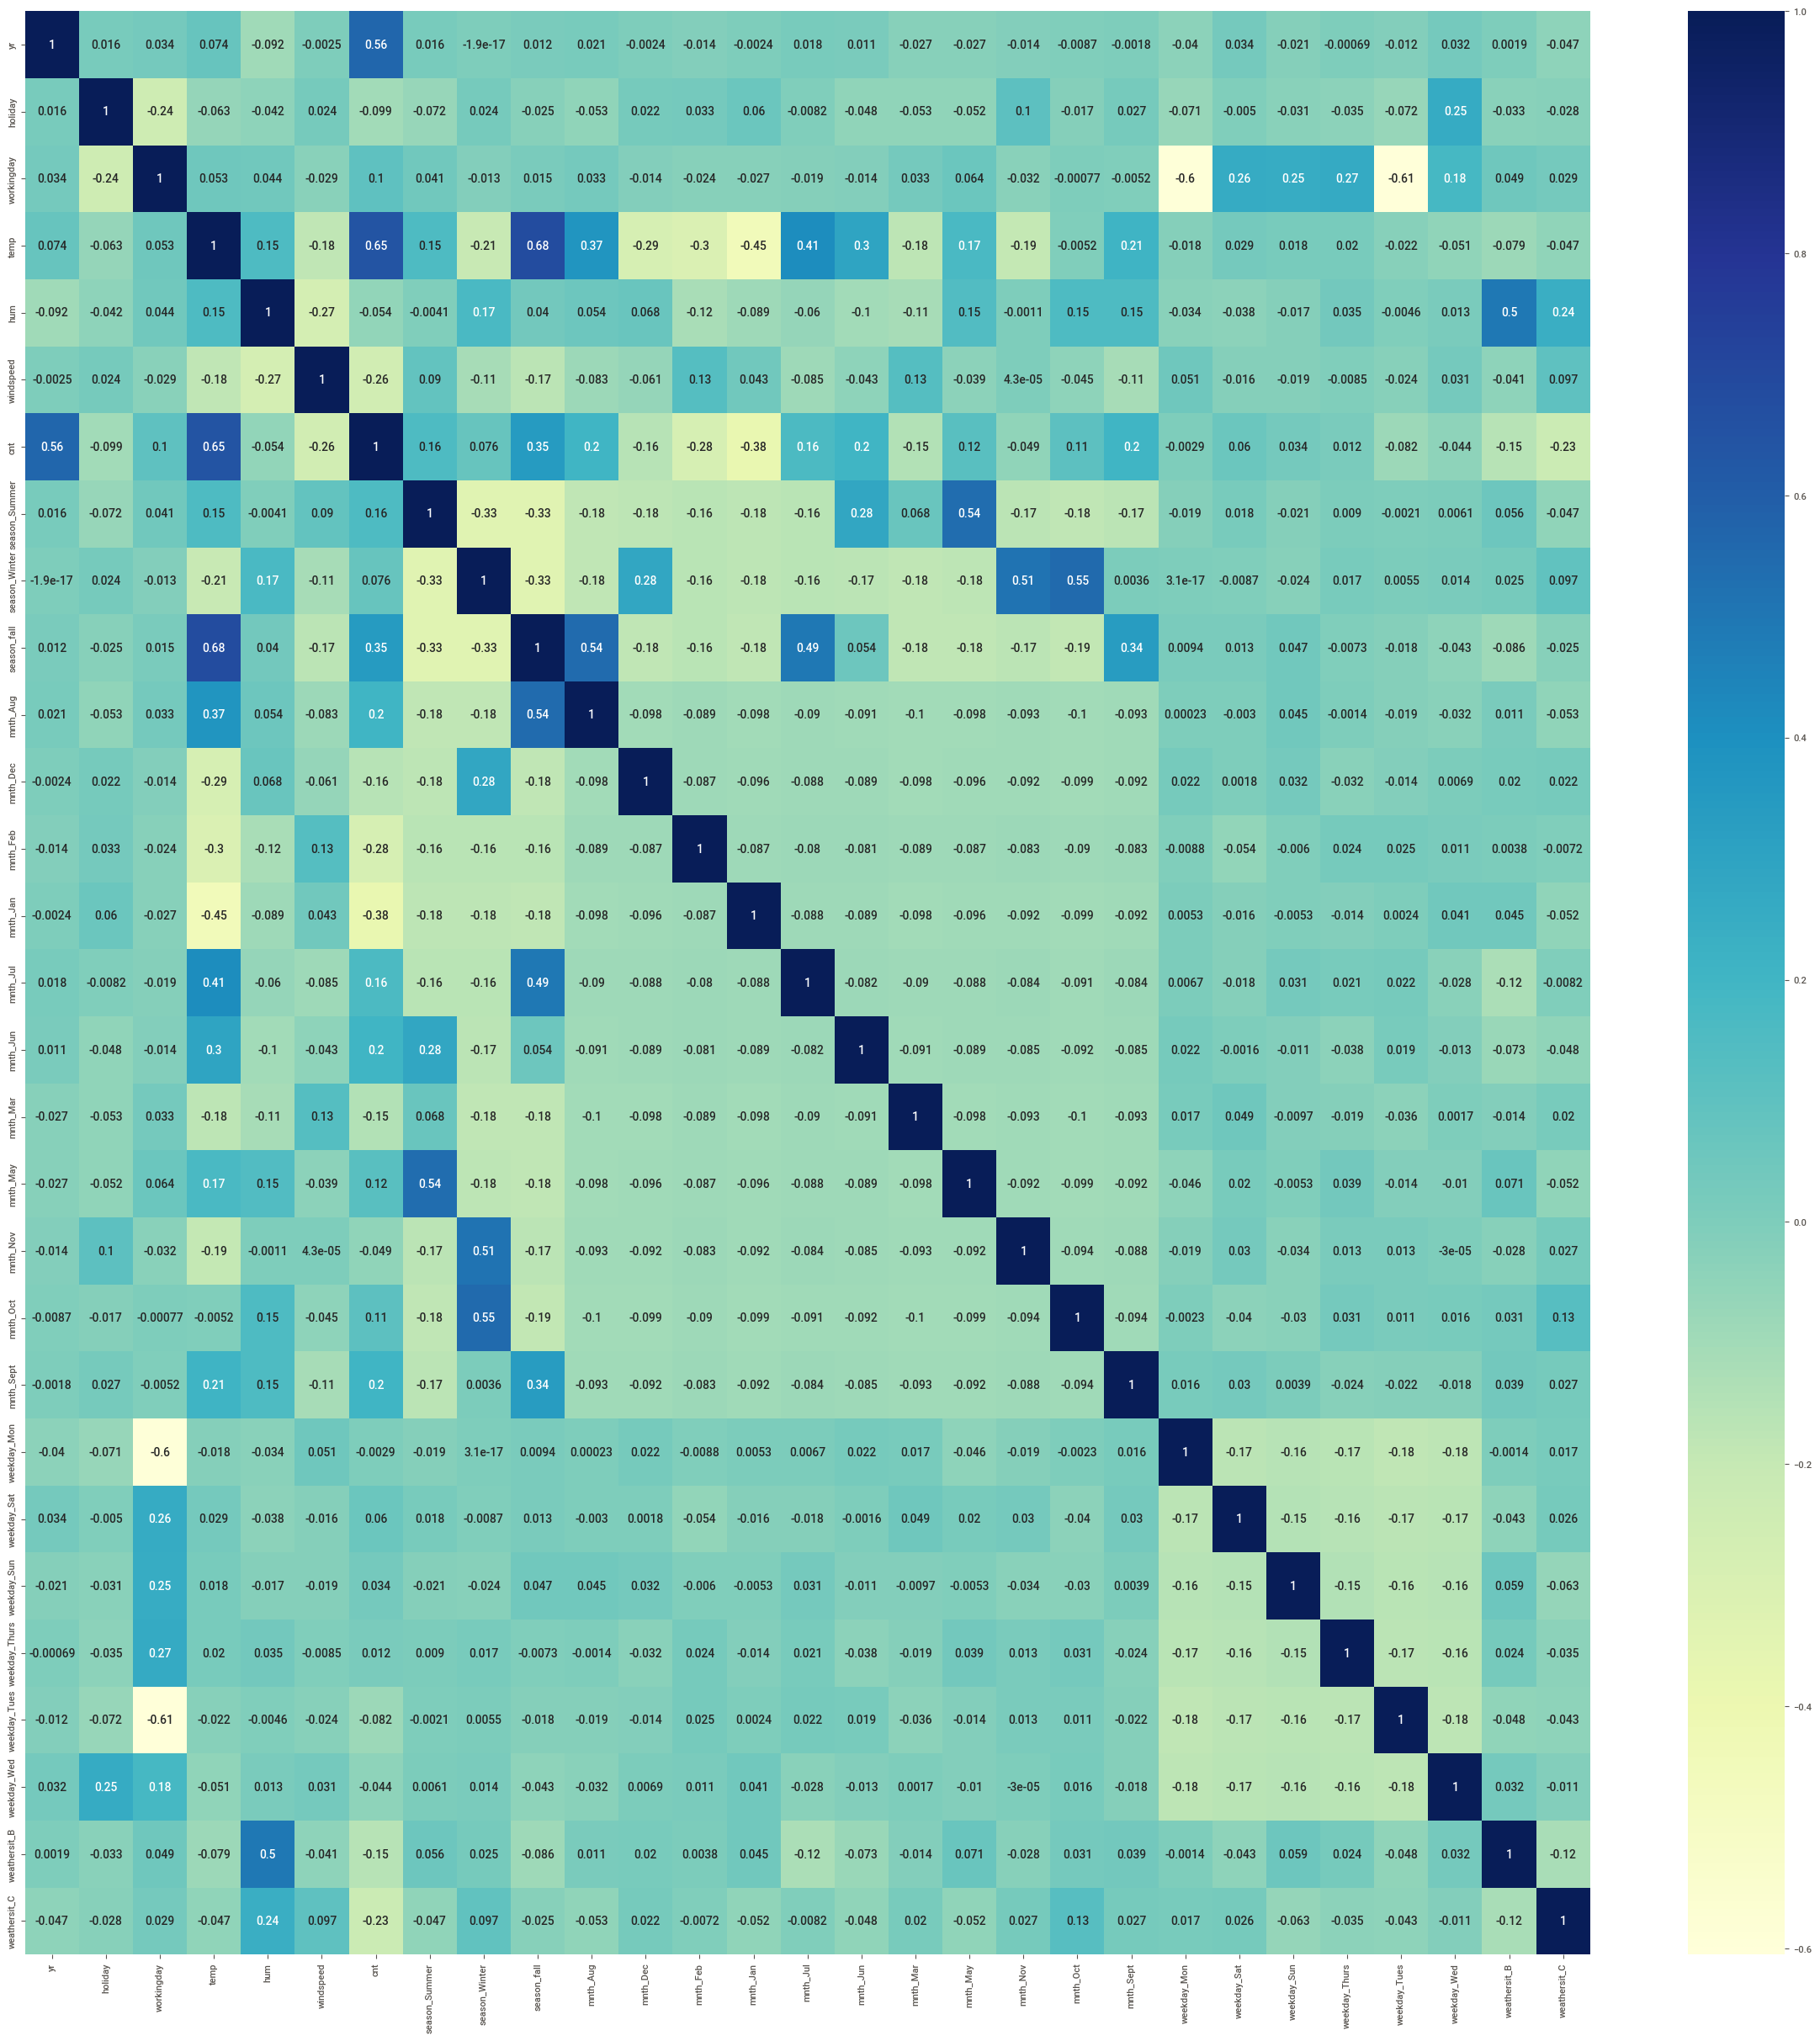

In [131]:
# Checking correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (30, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

Here the observation is column temp has higher correlation with the target column cnt. Lets try to vizualise them separately.

Text(0.5, 1.0, 'temp vs. count')

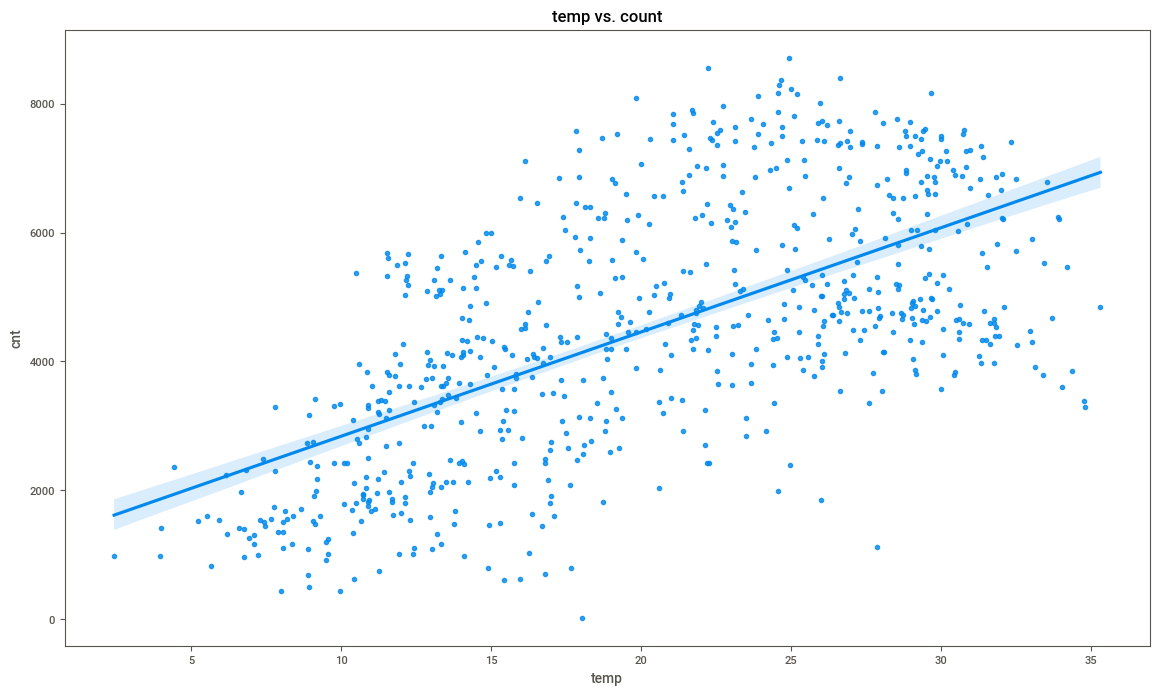

In [132]:
plt.figure(figsize=(14,8))
sns.regplot(x=df["temp"], y=df["cnt"])
plt.title('temp vs. count')

In [133]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Summer', 'season_Winter', 'season_fall', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

In [134]:
y_train = df_train.pop('cnt')
X_train = df_train

In [135]:
X_train

,yr,holiday,workingday,temp,hum,windspeed,season_Summer,season_Winter,season_fall,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
367,1,0,1,-1.884077,-1.351866,2.236778,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
648,1,0,1,-0.306750,-1.193941,-0.119144,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
44,0,0,1,-0.417439,-1.819690,2.905344,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
705,1,0,1,-0.938605,0.957450,-0.771827,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
379,1,0,0,-1.791834,-1.509791,0.772439,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,1.450449,0.209525,-0.787775,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
53,0,0,1,-1.487039,-1.482072,-1.238814,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
350,0,0,0,-1.284510,-0.496677,0.668885,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
79,0,0,1,-0.332015,0.765963,1.252711,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [136]:
# convert all the features into array before fitting the model
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.]])

#### Building Model

In [137]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const           -0.653202
yr               1.017974
holiday         -0.411023
workingday      -0.003153
temp             0.448014
hum             -0.091865
windspeed       -0.135515
season_Summer    0.434661
season_Winter    0.731778
season_fall      0.247946
mnth_Aug         0.073733
mnth_Dec        -0.231363
mnth_Feb        -0.128192
mnth_Jan        -0.262916
mnth_Jul        -0.155501
mnth_Jun         0.040115
mnth_Mar         0.011522
mnth_May         0.079795
mnth_Nov        -0.224076
mnth_Oct         0.057057
mnth_Sept        0.341945
weekday_Mon      0.014966
weekday_Sat     -0.010793
weekday_Sun      0.031493
weekday_Thurs   -0.069201
weekday_Tues    -0.253992
weekday_Wed     -0.075201
weathersit_B    -0.263225
weathersit_C    -1.170886
dtype: float64

In [138]:
# Instantiate LInear regression model
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [139]:
#Checking the coeefficient and intercept value
print("Intercept value is ",lm.intercept_)
print("Coefficient value is ",lm.coef_)

Intercept value is  -0.8165022106667941
Coefficient value is  [ 1.01797377 -0.24772288  0.16014742  0.4480136  -0.0918654  -0.13551471
  0.43466126  0.73177849  0.2479457   0.07373257 -0.2313627  -0.12819178
 -0.26291582 -0.1555015   0.0401149   0.01152153  0.07979484 -0.22407609
  0.05705665  0.34194499  0.1782667  -0.01079305  0.03149296 -0.06920147
 -0.09069123 -0.07520144 -0.26322451 -1.17088617]


In [140]:
#Summary of the model
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     125.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.29e-216
Time:                        09:07:08   Log-Likelihood:                -257.63
No. Observations:                 584   AIC:                             571.3
Df Residuals:                     556   BIC:                             693.6
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.6532      0.098     -6.673      0.000      -0.845      -0.461
yr                1.0180      0.033     31.107      0.000       0.954       1.082
holiday          -0.4110      0.089     -4.593      0.000      -0.587      -0.235
workingday       -0.0032      0.042     -0.075      0.940      -0.086       0.080
temp              0.4480      0.042     10.610      0.000       0.365       0.531
hum              -0.0919      0.023     -3.977      0.000      -0.137      -0.046
windspeed        -0.1355      0.018     -7.654      0.000      -0.170      -0.101
season_Summer     0.4347      0.099      4.374      0.000       0.239       0.630
season_Winter     0.7318      0.101      7.237      0.000       0.533       0.930
season_fall       0.2479      0.121      2.051      0.041       0.010       0.485
mnth_Aug          0.0737      0.137      0.539      0.590      -0.195       0.342
mnth_Dec         -0.2314      0.136     -1.696      0.090      -0.499       0.037
mnth_Feb         -0.1282      0.135     -0.952      0.342      -0.393       0.136
mnth_Jan         -0.2629      0.139     -1.893      0.059      -0.536       0.010
mnth_Jul         -0.1555      0.142     -1.095      0.274      -0.434       0.123
mnth_Jun          0.0401      0.099      0.404      0.686      -0.155       0.235
mnth_Mar          0.0115      0.104      0.111      0.912      -0.193       0.216
mnth_May          0.0798      0.085      0.937      0.349      -0.087       0.247
mnth_Nov         -0.2241      0.148     -1.512      0.131      -0.515       0.067
mnth_Oct          0.0571      0.144      0.396      0.692      -0.226       0.340
mnth_Sept         0.3419      0.130      2.635      0.009       0.087       0.597
weekday_Mon       0.0150      0.049      0.303      0.762      -0.082       0.112
weekday_Sat      -0.0108      0.060     -0.181      0.857      -0.128       0.107
weekday_Sun       0.0315      0.062      0.511      0.610      -0.090       0.153
weekday_Thurs    -0.0692      0.060     -1.152      0.250      -0.187       0.049
weekday_Tues     -0.2540      0.048     -5.299      0.000      -0.348      -0.160
weekday_Wed      -0.0752      0.060     -1.264      0.207      -0.192       0.042
weathersit_B     -0.2632      0.043     -6.144      0.000      -0.347      -0.179
weathersit_C     -1.1709      0.111    -10.548      0.000      -1.389      -0.953
==============================================================================
Omnibus:                      105.593   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              300.625
Skew:                          -0.880   Prob(JB):                     5.25e-66
Kurtosis:                       6.043   Cond. No.                     5.31e+15
================================================================

## Insights

Adjusted r square value of 85.6 is a good indicator of the model fit. But here we will need to check the important features explaing the target variable with RFE method.

Since we dont't want to eliminate the unimportant features manually and RFE does the same automatically.recuesively hence we will use this method here. we can start with any number of estimated features and then check the impact on the accuracy if it rises further.

In [141]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 12 features
lm = LinearRegression()
rfe1 = RFE(lm, n_features_to_select=12,step=1)

# Fit with 15 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)  

[ True  True  True  True False False  True  True  True False False False
 False  True False False False False False  True  True False False False
 False False  True  True]
[ 1  1  1  1  7  6  1  1  1 12  3  5  4  1 14 16 11  2 13  1  1 17 15 10
  8  9  1  1]


Building Model with the important features

In [142]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 18 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,workingday,temp,season_Summer,season_Winter,season_fall,mnth_Jul,mnth_Sept,weekday_Mon,weathersit_B,weathersit_C
367,1.0,1,0,1,-1.884077,0,0,0,0,0,0,0,0
648,1.0,1,0,1,-0.306750,0,1,0,0,0,0,0,0
44,1.0,0,0,1,-0.417439,0,0,0,0,0,0,0,0
705,1.0,1,0,1,-0.938605,0,1,0,0,0,0,1,0
379,1.0,1,0,0,-1.791834,0,0,0,0,0,0,0,0


In [143]:
# Fitting the model with important variables as chosen above
lm1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     241.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.23e-214
Time:                        09:07:08   Log-Likelihood:                -302.36
No. Observations:                 584   AIC:                             630.7
Df Residuals:                     571   BIC:                             687.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.9588      0.066    -14.598

Through trial and error we realise that if we consider 12 features which helps us to atleast keep the same amount of accuracy an number below that would adversely impact the accuracy of the model. Hence this would be a good indication to go ahead with the current model.

In [144]:
#Checking the multicolliearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

a=X_train_rfe1.drop('const',axis=1)

# Creating dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,season_fall,4.40
2,workingday,3.56
3,temp,2.41
4,season_Summer,2.19
0,yr,1.90
5,season_Winter,1.75
7,mnth_Jul,1.61
9,weekday_Mon,1.57
10,weathersit_B,1.56
8,mnth_Sept,1.39


Since all the VIF values of all columns are below 5 which we have taken the threshold limit hence we are fine with the result.  If there are any feature with values above 5 then we would need to remove them. In case there are multiple columns with VIF values more than 5 thwn we need to treat thenm one by one and again check the multicollinearity.

#### Residual Analysis

In [145]:
y_train_cnt = lm1.predict(X_train_rfe1)

Text(0.5, 0, 'Errors')

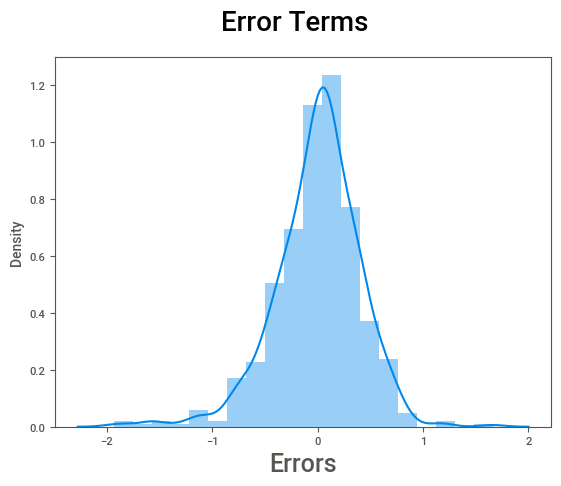

In [146]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)   

We see that the error terms are normally distributed which is an important assumptions for linear regression model.

#### Making predictions on test data

In [147]:
df_test[var] = scaler.transform(df_test[var])

In [148]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Summer', 'season_Winter', 'season_fall', 'mnth_Aug', 'mnth_Dec',
       'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed',
       'weathersit_B', 'weathersit_C'],
      dtype='object')

In [149]:
# Split the 'df_test' set into X and y after scaling
y_test = df_test.pop('cnt')
X_test = df_test

In [150]:
c=X_train_rfe1.drop('const',axis=1)

# checking the list 'col2' which had the variables RFE had selected
col2=c.columns
col2

Index(['yr', 'holiday', 'workingday', 'temp', 'season_Summer', 'season_Winter',
       'season_fall', 'mnth_Jul', 'mnth_Sept', 'weekday_Mon', 'weathersit_B',
       'weathersit_C'],
      dtype='object')

In [151]:
# Taking subset of these columns and create a new dataframe 'X_test_rfe2'
X_test_rfe2 = X_test[col2]

In [152]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 184 to 360
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          146 non-null    float64
 1   yr             146 non-null    int64  
 2   holiday        146 non-null    int64  
 3   workingday     146 non-null    int64  
 4   temp           146 non-null    float64
 5   season_Summer  146 non-null    uint8  
 6   season_Winter  146 non-null    uint8  
 7   season_fall    146 non-null    uint8  
 8   mnth_Jul       146 non-null    uint8  
 9   mnth_Sept      146 non-null    uint8  
 10  weekday_Mon    146 non-null    uint8  
 11  weathersit_B   146 non-null    uint8  
 12  weathersit_C   146 non-null    uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 8.0 KB


In [153]:
# predictions
y_pred = lm1.predict(X_test_rfe2)


Text(0, 0.5, 'y_pred')

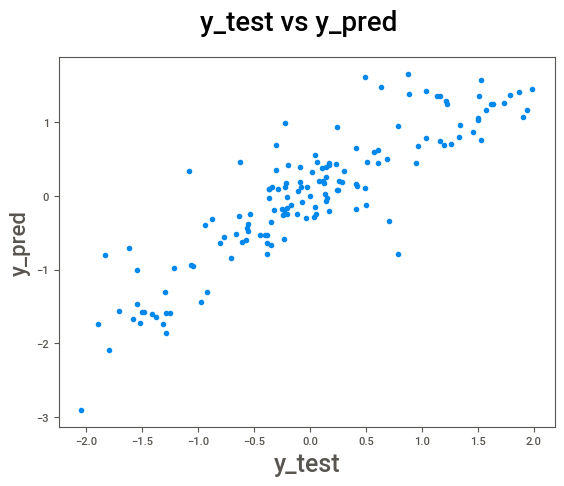

In [154]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

Checking the r2 score as the test accuracy seems to be good for the model 

In [155]:
# r2_score for 17 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7736513734490185

Thus, for the model with 17 variables, the r-squared on training and test data is about 85.7% and 78.60% respectively. The adjusted r square on the train dataset is about 85.3%

Similar to this we can also do trail and error with other regresssor models like decision tree regressor, stacking tree regressor to check which could be a better fit.

XG Boost Regresssor Model

In [ ]:
!pip install xgboost
import xgboost as xg 
from sklearn.metrics import mean_squared_error as MSE



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
model = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
model.fit(X_train, y_train)

# Predict the model
pred = model.predict(X_test)
  
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[23:07:06] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.334702


Here since the RMSE value is closer to zero hence we understand the  model is a good fit.

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [ ]:
sc_y = StandardScaler()
y_pred = regressor.predict(y_pred)
y_pred = sc_y.inverse_transform(y_pred) 

ValueError: Expected 2D array, got 1D array instead:
array=[-5.14982306e-01  1.71189541e+00 -3.46724418e-01  4.45501767e-01
  3.98023087e-01 -3.18019911e-01 -9.35673440e-03 -2.11383133e-01
  8.90662894e-01  1.89904236e-01  1.29981772e+00  7.71113896e-01
 -2.39381854e-02  8.87392942e-01 -1.67804311e+00  1.37545442e+00
  3.82465947e-01 -1.60858619e+00  3.70866954e-01  3.58081079e-01
  1.41408746e+00  4.00872649e-01  1.28035807e+00 -1.71775426e+00
 -4.23756304e-01  3.38841698e-02  1.42688329e+00  4.50728617e-02
  1.32094202e+00 -7.63394447e-02  1.24271276e+00  1.01036909e+00
 -7.21602893e-02  5.42409213e-01 -1.60788859e+00 -8.11551893e-04
 -6.05832166e-02  8.58993606e-01 -1.75042601e+00 -3.47960848e-01
 -1.50653769e-01 -7.69439877e-01  5.82707390e-01  5.44901743e-01
  6.03604178e-01  1.37567825e+00 -1.35717407e+00  4.58245378e-01
  2.10629145e-01 -8.70410503e-01  1.23494122e+00 -1.65389041e-01
  1.77427356e-01  1.42846533e+00 -6.79739771e-01  1.37752904e+00
  6.40092730e-02 -3.82358953e-02 -1.57450521e+00  5.44625053e-01
 -6.20798632e-02 -1.32218174e-01 -1.33863904e+00  5.71658842e-01
  8.72372496e-02  5.27910446e-01  1.58341237e+00  3.85831910e-01
 -1.35214663e-01  9.92619476e-01 -1.06882047e+00  2.13479735e-01
  1.02047159e+00  8.07049185e-01  4.55276489e-01 -2.99721536e-01
 -7.01189774e-02  1.46333948e+00  4.11402211e-01 -3.26253105e-01
 -1.71188247e-01  4.84261061e-01 -3.87204524e-01 -4.18367625e-01
  1.05298090e+00 -7.85083031e-01  1.07445106e+00 -6.24640961e-01
 -2.80405772e-01 -7.87607683e-01 -1.84611759e+00  1.19022388e-01
  1.65162969e+00 -3.98730712e-01 -4.35029115e-01  1.40929160e+00
  5.00336150e-01 -3.12154624e+00 -2.80807180e-01 -1.70300732e+00
  1.91411244e-01  8.77224348e-02 -1.05534313e+00  1.26798529e-01
  4.14000452e-01 -6.10228780e-01 -1.21566094e+00 -4.46111866e-01
 -2.55739029e-01 -2.12878366e+00 -3.90294812e-01  7.83042851e-01
  4.13697712e-01  1.05493875e+00 -7.31832860e-01 -6.78262498e-01
  3.99292651e-02 -1.92258032e+00 -5.33014419e-01  2.83892894e-01
  1.19333652e+00  1.33622393e-01 -2.51440672e-01  1.17591968e+00
  3.70930942e-01 -4.90487477e-01  1.12769380e+00 -1.44149441e+00
  1.11463757e-01  8.63644891e-01  6.54170873e-01  4.37120725e-01
 -7.20346736e-01 -3.54937261e-01  8.83844515e-01 -9.63531577e-01
 -1.40331837e+00 -3.05081335e-01 -2.10158276e-01  4.34199411e-01
 -8.54328417e-01  3.45051032e-01 -8.47239358e-01 -1.58639768e+00
 -2.91625366e-01 -1.67188039e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.